# Getting Starting

## Importing and Sampling

In [114]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [115]:
data=pd.read_parquet('./fhvhv_tripdata_2022-11.parquet')
data = data.sample(n=100000, random_state=1)

In [35]:
data.head(10)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
12201792,HV0003,B03404,B03404,2022-11-20 10:58:36,2022-11-20 11:02:12,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.280,...,2.24,2.75,0.0,3.09,16.33,N,N,,N,N
5140632,HV0003,B03404,B03404,2022-11-09 18:14:12,2022-11-09 18:19:25,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.390,...,0.94,0.00,0.0,0.00,6.83,N,N,,N,N
13040156,HV0003,B03404,B03404,2022-11-21 19:10:06,2022-11-21 19:13:37,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.790,...,3.78,2.75,0.0,0.00,29.50,N,N,,N,N
2107754,HV0003,B03404,B03404,2022-11-04 17:46:25,2022-11-04 17:46:43,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.210,...,1.27,0.00,0.0,5.00,11.18,N,N,,N,N
17227919,HV0003,B03404,B03404,2022-11-29 15:23:51,2022-11-29 15:28:55,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.630,...,0.67,0.00,0.0,0.00,5.94,N,N,,N,N
10924600,HV0003,B03404,B03404,2022-11-18 19:55:59,2022-11-18 19:59:36,2022-11-18 19:59:57,2022-11-18 20:06:06,41,238,1.140,...,0.70,0.00,0.0,1.00,6.84,N,N,,N,N
14977583,HV0005,B03406,None,2022-11-25 10:13:47,NaT,2022-11-25 10:18:30,2022-11-25 10:35:28,198,138,7.584,...,2.46,0.00,2.5,0.00,17.86,N,N,N,N,N
7891490,HV0005,B03406,None,2022-11-13 20:00:59,NaT,2022-11-13 20:03:31,2022-11-13 20:30:47,37,79,4.435,...,2.03,2.75,0.0,0.00,19.67,N,N,N,N,N
15668172,HV0003,B03404,B03404,2022-11-26 17:41:07,2022-11-26 17:42:42,2022-11-26 17:43:24,2022-11-26 17:53:56,143,246,1.730,...,1.03,2.75,0.0,0.00,7.93,N,N,,N,N
12055493,HV0003,B03404,B03404,2022-11-20 04:51:32,2022-11-20 04:55:31,2022-11-20 04:55:59,2022-11-20 05:00:53,114,249,0.630,...,0.65,2.75,0.0,0.00,17.56,N,N,,N,Y


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 12201792 to 7419397
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   hvfhs_license_num     200000 non-null  object        
 1   dispatching_base_num  200000 non-null  object        
 2   originating_base_num  143368 non-null  object        
 3   request_datetime      200000 non-null  datetime64[us]
 4   on_scene_datetime     143368 non-null  datetime64[us]
 5   pickup_datetime       200000 non-null  datetime64[us]
 6   dropoff_datetime      200000 non-null  datetime64[us]
 7   PULocationID          200000 non-null  int64         
 8   DOLocationID          200000 non-null  int64         
 9   trip_miles            200000 non-null  float64       
 10  trip_time             200000 non-null  int64         
 11  base_passenger_fare   200000 non-null  float64       
 12  tolls                 200000 non-null  float64       
 

## Preliminary Feature Selection 

### Dropping irrelevant features

Accroding to our experiment, features such as *hvfhs_license_num, dispatching_base_num, originating_base_num, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag* are not relevant to the objective of this project.

In [116]:
## dropping columns 
data.drop(columns=['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num', 'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag'], inplace=True)
data.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
12201792,2022-11-20 10:58:36,2022-11-20 11:02:12,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.28,1024,25.21,0.0,0.76,2.24,2.75,0.0,3.09,16.33
5140632,2022-11-09 18:14:12,2022-11-09 18:19:25,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.39,415,10.64,0.0,0.32,0.94,0.00,0.0,0.00,6.83
13040156,2022-11-21 19:10:06,2022-11-21 19:13:37,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.79,1215,42.57,0.0,1.28,3.78,2.75,0.0,0.00,29.50
2107754,2022-11-04 17:46:25,2022-11-04 17:46:43,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.21,939,14.28,0.0,0.43,1.27,0.00,0.0,5.00,11.18
17227919,2022-11-29 15:23:51,2022-11-29 15:28:55,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.63,268,7.51,0.0,0.23,0.67,0.00,0.0,0.00,5.94


In [37]:
data.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,100000,71591,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2022-11-15 20:36:46.586420,2022-11-15 19:25:26.678171,2022-11-15 20:41:50.710420,2022-11-15 21:01:36.244750,139.602880,143.134330,5.044750,1187.278680,23.772484,1.142381,0.752901,2.006722,1.138895,0.213812,1.133788,18.509433
min,2022-10-31 23:48:27,2022-10-31 23:59:14,2022-11-01 00:00:27,2022-11-01 00:08:27,3.000000,1.000000,0.000000,1.000000,-56.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
25%,2022-11-08 16:11:07.250000,2022-11-08 15:55:46,2022-11-08 16:17:45.500000,2022-11-08 16:39:00.250000,76.000000,76.000000,1.586000,606.000000,11.450000,0.000000,0.340000,0.950000,0.000000,0.000000,0.000000,8.570000
50%,2022-11-15 20:22:29.500000,2022-11-15 19:21:05,2022-11-15 20:29:24.500000,2022-11-15 20:46:35,141.000000,142.000000,2.993500,971.000000,18.030000,0.000000,0.540000,1.530000,0.000000,0.000000,0.000000,14.160000
75%,2022-11-22 20:09:29,2022-11-22 18:41:28,2022-11-22 20:13:00,2022-11-22 20:31:33.500000,211.000000,219.000000,6.260000,1522.000000,29.260000,0.000000,0.910000,2.530000,2.750000,0.000000,0.000000,23.260000
max,2022-11-30 23:57:37,2022-11-30 23:59:10,2022-11-30 23:59:38,2022-12-01 00:42:34,265.000000,265.000000,159.230000,13955.000000,399.940000,74.960000,14.290000,42.280000,5.500000,5.000000,80.000000,316.790000
std,NaN,NaN,NaN,NaN,74.789473,77.642126,5.825195,839.618494,19.584645,3.914128,0.661701,1.627630,1.351373,0.699794,3.094663,15.307690


## Exploring, Cleaning and Transforming Indivual Features

### Airport Fee

In [38]:
counts = data['airport_fee'].value_counts()
counts

airport_fee
0.00    91389
2.50     8407
1.25      175
5.00       29
Name: count, dtype: int64

In [117]:
data['is_airport_trip'] = np.where(data['airport_fee'] > 0, 1, 0)

### Congestion Surcharge

In [9]:
counts = data['congestion_surcharge'].value_counts()
counts

congestion_surcharge
0.00    58006
2.75    41135
0.75      831
5.50       25
3.00        2
1.50        1
Name: count, dtype: int64

In [118]:
def calcular_congestion_surcharge(congestion_surcharge):
    if congestion_surcharge == 0:
        return 0        # no congestion
    elif congestion_surcharge > 0 and congestion_surcharge < 2:
        return 1        # low
    elif congestion_surcharge >= 2 and congestion_surcharge < 3:
        return 2        # medium
    else:
        return 3        # high
# ref https://www.kaggle.com/code/alexbonella/ny-trip-datexland-price-model

In [119]:
data['congestion_lvl'] = data['congestion_surcharge'].apply(calcular_congestion_surcharge)

### Base Passenger Fare

In [120]:
print(f"base_passenger_fare Min: {data['base_passenger_fare'].min()}, Max: {data['base_passenger_fare'].max()}")


base_passenger_fare Min: -56.57, Max: 399.94


In [121]:
data[data['base_passenger_fare'] > 400]

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,is_airport_trip,congestion_lvl


In [122]:
data[data['base_passenger_fare'] < 5].head(10)

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,is_airport_trip,congestion_lvl
8846724,2022-11-15 14:37:34,2022-11-15 14:43:33,2022-11-15 15:05:00,2022-11-15 15:23:29,89,89,0.03,1109,-2.32,0.0,0.59,1.73,0.00,0.0,0.0,14.64,0,0
14458049,2022-11-24 12:46:16,2022-11-24 12:49:04,2022-11-24 12:49:05,2022-11-24 12:52:01,249,249,0.02,176,-6.64,0.0,0.98,2.91,2.75,0.0,0.0,0.00,0,2
11769569,2022-11-19 20:13:36,2022-11-19 20:17:05,2022-11-19 20:18:10,2022-11-19 20:21:15,39,39,0.62,185,4.60,0.0,0.17,0.51,0.00,0.0,0.0,6.64,0,0
1951073,2022-11-04 11:58:55,2022-11-04 11:59:27,2022-11-04 12:01:40,2022-11-04 12:06:00,249,249,0.05,260,-3.71,0.0,0.24,0.72,2.75,0.0,0.0,0.21,0,2
6925747,2022-11-12 13:15:08,2022-11-12 13:17:05,2022-11-12 13:18:02,2022-11-12 13:40:17,256,144,2.77,1335,-2.75,0.0,0.00,0.00,2.75,0.0,0.0,16.22,0,2
12682554,2022-11-21 07:42:53,2022-11-21 07:48:58,2022-11-21 07:49:16,2022-11-21 07:58:53,238,239,1.04,577,3.72,0.0,0.27,0.81,2.75,0.0,0.0,6.31,0,2
1058621,2022-11-02 21:51:43,2022-11-02 22:03:05,2022-11-02 22:03:05,2022-11-02 22:08:32,234,113,0.61,327,-4.49,0.0,0.44,1.30,2.75,0.0,0.0,0.80,0,2
3750887,2022-11-07 06:26:27,2022-11-07 06:29:04,2022-11-07 06:31:01,2022-11-07 06:36:12,239,142,1.00,311,4.54,0.0,0.22,0.65,2.75,0.0,0.0,7.13,0,2
5683053,2022-11-10 17:41:22,2022-11-10 17:45:24,2022-11-10 17:46:42,2022-11-10 17:53:50,42,42,1.08,428,1.38,0.0,0.27,0.79,0.00,0.0,0.0,8.68,0,0
17253382,2022-11-29 16:53:17,2022-11-29 16:53:27,2022-11-29 16:54:29,2022-11-29 17:11:38,24,142,2.45,1029,-4.56,0.0,0.46,1.35,2.75,0.0,0.0,11.93,0,2


In [123]:
# Deleting rows with negative fare and fare less than 5
data = data[(data['base_passenger_fare'] > 5)]

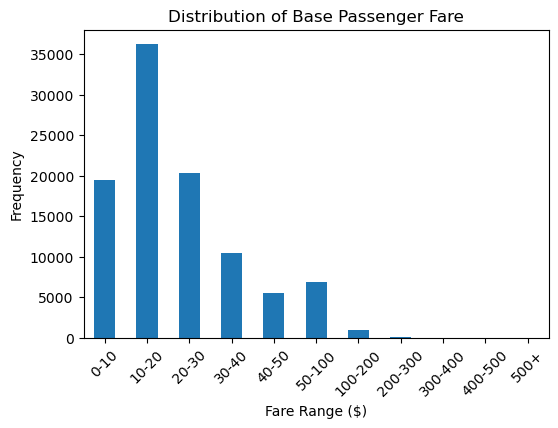

In [124]:
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500+']

# Step 2: Create a new column in your DataFrame for the binned fare values
data['fare_range'] = pd.cut(data['base_passenger_fare'], bins=bins, labels=labels)

# Step 3: Calculate the value counts for each bin to see the distribution
fare_distribution = data['fare_range'].value_counts().sort_index()

# Step 4: Plot the distribution as a bar chart
plt.figure(figsize=(6, 4))
fare_distribution.plot(kind='bar')
plt.title('Distribution of Base Passenger Fare')
plt.xlabel('Fare Range ($)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

data.drop(columns=['fare_range'], inplace=True)

In [47]:
data.shape

(99854, 18)

### BCF

In [126]:
print(f"bcf Min: {data['bcf'].min()}, Max: {data['bcf'].max()}")

bcf Min: 0.0, Max: 24.22


In [48]:
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18']

# Step 2: Create a new column in your DataFrame for the binned fare values
data['bcf_range'] = pd.cut(data['bcf'], bins=bins, labels=labels)

data['bcf_range'].value_counts()

data.drop(columns=['bcf_range'], inplace=True)

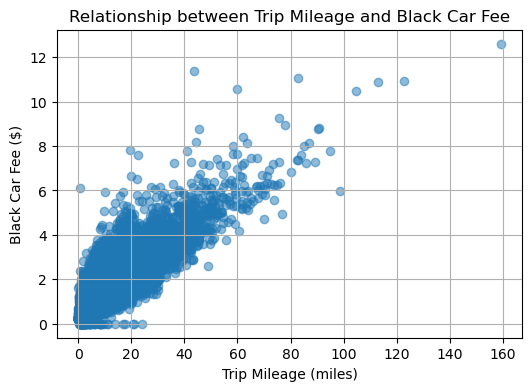

In [49]:
plt.figure(figsize=(6, 4))
plt.scatter(data['trip_miles'], data['bcf'], alpha=0.5)  # alpha is set for better visualization of point density
plt.title('Relationship between Trip Mileage and Black Car Fee')
plt.xlabel('Trip Mileage (miles)')
plt.ylabel('Black Car Fee ($)')
plt.grid(True)
plt.show()

In [50]:
data['bcf_charge'] = np.where(data['bcf'] > 0, 1, 0)

In [51]:
data.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,is_airport_trip,congestion_lvl,bcf_charge
12201792,2022-11-20 10:58:36,2022-11-20 11:02:12,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.28,1024,25.21,0.0,0.76,2.24,2.75,0.0,3.09,16.33,0,2,1
5140632,2022-11-09 18:14:12,2022-11-09 18:19:25,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.39,415,10.64,0.0,0.32,0.94,0.00,0.0,0.00,6.83,0,0,1
13040156,2022-11-21 19:10:06,2022-11-21 19:13:37,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.79,1215,42.57,0.0,1.28,3.78,2.75,0.0,0.00,29.50,0,2,1
2107754,2022-11-04 17:46:25,2022-11-04 17:46:43,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.21,939,14.28,0.0,0.43,1.27,0.00,0.0,5.00,11.18,0,0,1
17227919,2022-11-29 15:23:51,2022-11-29 15:28:55,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.63,268,7.51,0.0,0.23,0.67,0.00,0.0,0.00,5.94,0,0,1


### Trip Time and Trip Miles

In [52]:
data[['trip_miles', 'trip_time']].describe()

,trip_miles,trip_time
count,99854.000000,99854.000000
mean,5.045370,1187.421636
std,5.822927,839.158608
min,0.000000,1.000000
25%,1.590000,606.000000
50%,3.000000,971.000000
75%,6.262750,1522.000000
max,159.230000,13955.000000


In [125]:
# Calculating real trip time using dropoff and pickup datetime
data['trip_time_real'] = round((data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() / 60.0,3) 

In [126]:
# Only consider trip time greater than 5 mins and less than 2 hours
data = data[(data['trip_time_real'] > 5) & (data['trip_time_real'] < 120)]  

In [55]:
# Calculating the average speed miles/min
temp = data.loc[(data['trip_miles'] > 0) & (data['trip_time_real'] > 0), ['trip_miles', 'trip_time_real']]
temp['speed'] = temp['trip_miles'] / temp['trip_time_real']
avg_speed = temp['speed'].mean()
del temp
avg_speed

0.23080569330064907

In [127]:
# Fixing rows with trip miles equal to 0 with average speed
data.loc[data['trip_miles'] == 0, 'trip_miles'] = avg_speed * data['trip_time_real']

In [128]:
# Filter out rows with mileage less than 1
data = data[(data['trip_miles'] > 1)] 

In [129]:
data[['trip_miles', 'trip_time', 'trip_time_real']].describe()

,trip_miles,trip_time,trip_time_real
count,89457.000000,89457.000000,89457.000000
mean,5.512696,1277.192115,21.284939
std,5.822208,816.298967,13.601617
min,1.001000,301.000000,5.017000
25%,1.930000,702.000000,11.700000
50%,3.430000,1060.000000,17.667000
75%,6.860000,1605.000000,26.750000
max,98.706000,7183.000000,119.717000


### Total Fare

In [130]:
### Total Fare
data["total_fare"] = data["base_passenger_fare"] + data["congestion_surcharge"] + data["airport_fee"]
data["fare_per_mile"] = (data["total_fare"] / data["trip_miles"]).round(2)

#### Other Considerations:

Driver Pay contains some negative value, however, we are not using this feature to predict the fare, but it was used as a reference earlier when exploring the passenger base fare.

## More Feature Engineering

### Date & Time

In [63]:
data.head()

,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,is_airport_trip,congestion_lvl,trip_time_real,total_fare,fare_per_mile,pickup_day_no,pickup_hour
12201792,2022-11-20 11:02:45,41,48,5.28,25.21,0,2,17.067,27.96,5.30,6,11
5140632,2022-11-09 18:19:42,157,82,1.39,10.64,0,0,6.917,10.64,7.65,2,18
13040156,2022-11-21 19:13:41,163,125,4.79,42.57,0,2,20.250,45.32,9.46,0,19
2107754,2022-11-04 17:47:21,10,130,2.21,14.28,0,0,15.650,14.28,6.46,4,17
10924600,2022-11-18 19:59:57,41,238,1.14,7.91,0,0,6.150,7.91,6.94,4,19


In [132]:
data.drop(columns=['request_datetime', 'on_scene_datetime', 'tips', 'driver_pay', 'tolls', 'dropoff_datetime', 'airport_fee', 'congestion_surcharge', 'trip_time', 'sales_tax', 'bcf' ], inplace=True)

In [133]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['pickup_day_no']=data['pickup_datetime'].dt.weekday # monday 0 - sunday 6
data['pickup_hour']=data['pickup_datetime'].dt.hour

In [31]:
data.describe()

,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,is_airport_trip,congestion_lvl,trip_time_real,total_fare,fare_per_mile,pickup_day_no,pickup_hour
count,89457,89457.000000,89457.000000,89457.000000,89457.000000,89457.000000,89457.000000,89457.000000,89457.000000,89457.000000,89457.000000,89457.000000
mean,2022-11-15 19:57:21.777870,139.610718,143.504656,5.512696,25.389550,0.095409,0.848240,21.284939,26.787808,6.403285,3.061057,13.490247
min,2022-11-01 00:00:27,3.000000,1.000000,1.001000,5.010000,0.000000,0.000000,5.017000,5.010000,0.550000,0.000000,0.000000
25%,2022-11-08 15:17:15,76.000000,76.000000,1.930000,12.960000,0.000000,0.000000,11.700000,13.920000,4.220000,1.000000,9.000000
50%,2022-11-15 19:56:16,141.000000,142.000000,3.430000,19.710000,0.000000,0.000000,17.667000,20.970000,5.650000,3.000000,14.000000
75%,2022-11-22 19:51:38,211.000000,220.000000,6.860000,31.030000,0.000000,2.000000,26.750000,32.860000,7.510000,5.000000,19.000000
max,2022-11-30 23:59:38,265.000000,265.000000,98.706000,376.450000,1.000000,3.000000,119.717000,376.450000,147.580000,6.000000,23.000000
std,NaN,74.578969,77.773837,5.822208,19.587142,0.293781,0.984371,13.601617,20.138213,3.384788,1.954501,6.450058


In [134]:
# Creating new feature day_x_time, categorical feature of combination of day of the week and hour of the day
data['day_x_time'] = data['pickup_day_no'].astype(str) + data['pickup_hour'].astype(str).str.zfill(2)

In [135]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [152]:
X = data.drop('total_fare', axis=1)  # Assuming 'total_fare' is the target
y = data['total_fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

In [153]:
data.head()

,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,is_airport_trip,congestion_lvl,trip_time_real,total_fare,fare_per_mile,pickup_day_no,pickup_hour,day_x_time
12201792,2022-11-20 11:02:45,41,48,5.28,25.21,0,2,17.067,27.96,5.30,6,11,611
5140632,2022-11-09 18:19:42,157,82,1.39,10.64,0,0,6.917,10.64,7.65,2,18,218
13040156,2022-11-21 19:13:41,163,125,4.79,42.57,0,2,20.250,45.32,9.46,0,19,019
2107754,2022-11-04 17:47:21,10,130,2.21,14.28,0,0,15.650,14.28,6.46,4,17,417
10924600,2022-11-18 19:59:57,41,238,1.14,7.91,0,0,6.150,7.91,6.94,4,19,419


### Encoding day_x_time and PU/DOLocationID

In [154]:
encoder = ce.TargetEncoder()
X_train['enc_day_x_time'] = encoder.fit_transform(X_train['day_x_time'], X_train['fare_per_mile'])
X_test['enc_day_x_time'] = encoder.transform(X_test['day_x_time'])

In [155]:
X_train.head()

,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,is_airport_trip,congestion_lvl,trip_time_real,fare_per_mile,pickup_day_no,pickup_hour,day_x_time,enc_day_x_time
3065105,2022-11-05 23:32:58,16,265,4.37,18.73,0,0,14.333,4.29,5,23,523,7.011442
11355584,2022-11-19 10:52:58,29,165,2.54,14.04,0,0,12.917,5.53,5,10,510,5.658756
3867906,2022-11-07 11:45:09,230,138,10.35,41.46,1,2,33.567,4.51,0,11,011,6.567611
3417151,2022-11-06 14:43:01,90,148,2.53,17.90,0,2,16.683,8.16,6,14,614,6.805187
9571777,2022-11-16 18:27:25,148,88,3.17,18.95,0,2,12.167,6.85,2,18,218,7.735332


In [156]:
X_test['enc_day_x_time'] = encoder.transform(X_test['day_x_time'])

In [161]:
X_train.head()

,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,is_airport_trip,congestion_lvl,trip_time_real,fare_per_mile,pickup_day_no,pickup_hour,day_x_time,enc_day_x_time,enc_PULocationID,enc_DOLocationID,total_fare
3065105,2022-11-05 23:32:58,16,265,4.37,18.73,0,0,14.333,4.29,5,23,523,7.011442,16,265,18.73
11355584,2022-11-19 10:52:58,29,165,2.54,14.04,0,0,12.917,5.53,5,10,510,5.658756,29,165,14.04
3867906,2022-11-07 11:45:09,230,138,10.35,41.46,1,2,33.567,4.51,0,11,011,6.567611,230,138,46.71
3417151,2022-11-06 14:43:01,90,148,2.53,17.90,0,2,16.683,8.16,6,14,614,6.805187,90,148,20.65
9571777,2022-11-16 18:27:25,148,88,3.17,18.95,0,2,12.167,6.85,2,18,218,7.735332,148,88,21.70


In [160]:
loc_encoder = ce.TargetEncoder()
features = ['PULocationID', 'DOLocationID']
X_train = pd.concat([X_train, y_train], axis=1)
X_train['enc_PU_DO'] = loc_encoder.fit_transform(X_train[features],X_train['total_fare'])
X_test['enc_PU_DO'] = loc_encoder.transform(X_test['PULocationID'])


In [80]:
X_test.drop(columns=['pickup_datetime', 'day_x_time','PULocationID', 'DOLocationID', 'pickup_day_no', 'pickup_hour', 'base_passenger_fare', 'day_x_time', 'fare_per_mile'], inplace=True)
X_train.drop(columns=['pickup_datetime', 'day_x_time','PULocationID', 'DOLocationID', 'pickup_day_no', 'pickup_hour', 'base_passenger_fare', 'day_x_time', 'fare_per_mile'], inplace=True)

In [33]:
import category_encoders as ce
features = ['day_x_time', 'PULocationID', 'DOLocationID']
encoder = ce.TargetEncoder(cols=features[0])
data_encoded = encoder.fit_transform(data[features[0]], data['fare_per_mile'])
data_encoded = data_encoded.rename(columns={
    'day_x_time': 'enc_day_x_time',
    # 'PULocationID': 'enc_PULocationID',
    # 'DOLocationID': 'enc_DOLocationID'
})
data_encoded.head()

,enc_day_x_time
12201792,6.119045
5140632,7.650497
13040156,6.092102
2107754,7.941201
10924600,6.836484


In [144]:
data = pd.concat([data, data_encoded], axis=1)

In [162]:
features = ['PULocationID', 'DOLocationID']
loc_encoder = ce.TargetEncoder(cols=features[1:])
data_encoded = encoder.fit_transform(X_train[features[1:]], X_train['total_fare'])
data_encoded = data_encoded.rename(columns={
    # 'day_x_time': 'enc_day_x_time',
    'PULocationID': 'enc_PULocationID',
    'DOLocationID': 'enc_DOLocationID'
})
data_encoded.head()

,enc_DOLocationID
3065105,265
11355584,165
3867906,138
3417151,148
9571777,88


In [146]:
data = pd.concat([data, data_encoded], axis=1)

In [78]:
# Cleaning up columns
data.drop(columns=['pickup_datetime', 'day_x_time','PULocationID', 'DOLocationID', 'pickup_day_no', 'pickup_hour', 'base_passenger_fare'], inplace=True)

In [79]:
data.head()

,trip_miles,is_airport_trip,congestion_lvl,trip_time_real,total_fare,fare_per_mile
12201792,5.28,0,2,17.067,27.96,5.30
5140632,1.39,0,0,6.917,10.64,7.65
13040156,4.79,0,2,20.250,45.32,9.46
2107754,2.21,0,0,15.650,14.28,6.46
10924600,1.14,0,0,6.150,7.91,6.94


## EDA

<Axes: xlabel='trip_miles', ylabel='total_fare'>

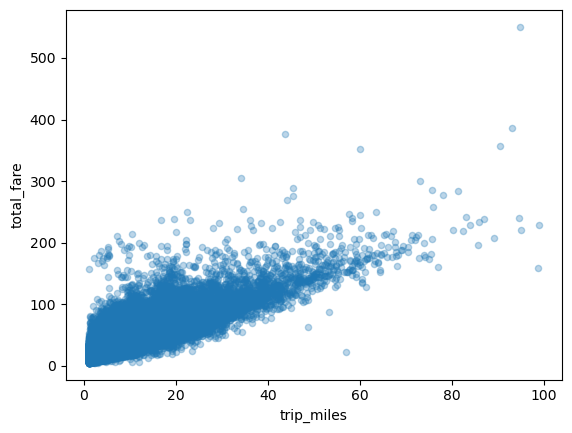

In [149]:
data.plot.scatter(x='trip_miles', y='total_fare', alpha=0.3)

<Axes: xlabel='trip_time_real', ylabel='total_fare'>

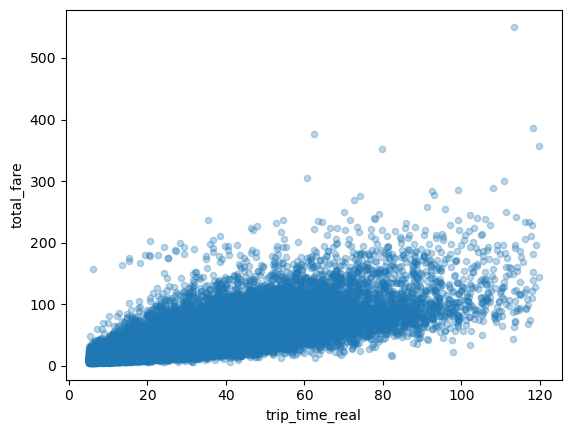

In [150]:
data.plot.scatter(x='trip_time_real', y='total_fare', alpha=0.3)

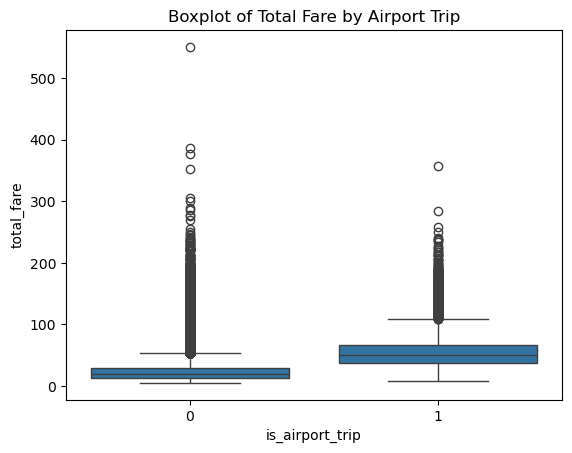

In [151]:
sns.boxplot(x='is_airport_trip', y='total_fare', data=data)
plt.title('Boxplot of Total Fare by Airport Trip')
plt.show()

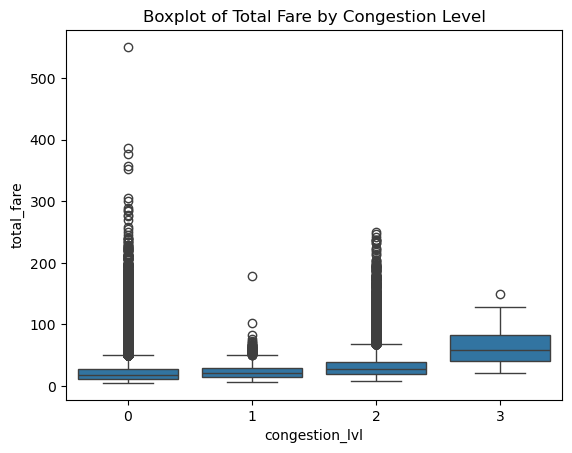

In [152]:
sns.boxplot(x='congestion_lvl', y='total_fare', data=data)
plt.title('Boxplot of Total Fare by Congestion Level')
plt.show()

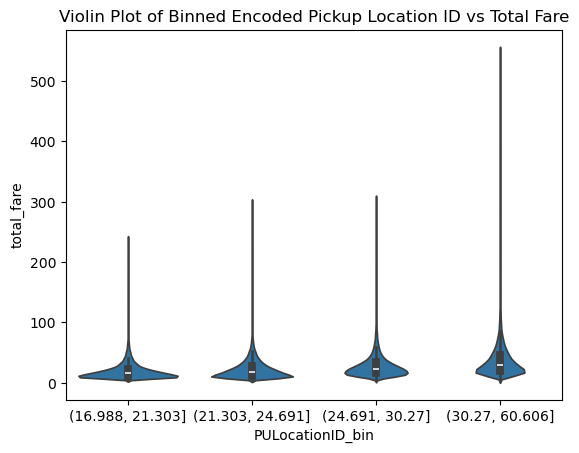

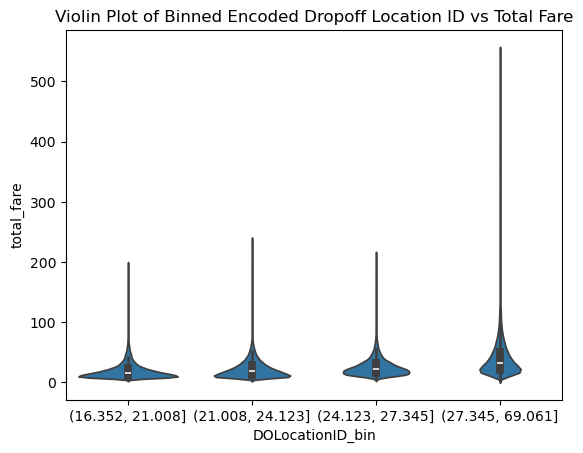

In [153]:
data['PULocationID_bin'] = pd.qcut(data['enc_PULocationID'], q=4)
data['DOLocationID_bin'] = pd.qcut(data['enc_DOLocationID'], q=4)

sns.violinplot(x='PULocationID_bin', y='total_fare', data=data)
plt.title('Violin Plot of Binned Encoded Pickup Location ID vs Total Fare')
plt.show()

sns.violinplot(x='DOLocationID_bin', y='total_fare', data=data)
plt.title('Violin Plot of Binned Encoded Dropoff Location ID vs Total Fare')
plt.show()


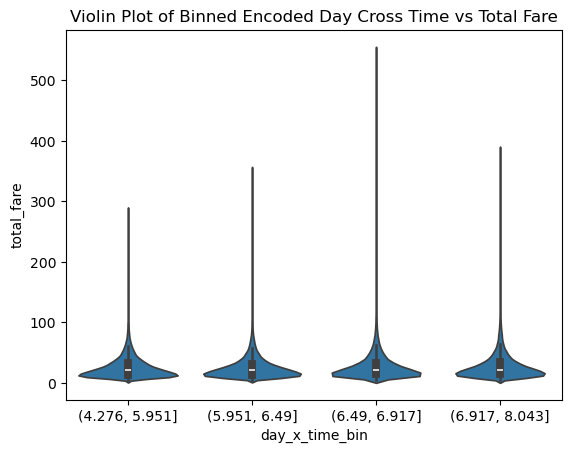

In [154]:
data['day_x_time_bin'] = pd.qcut(data['enc_day_x_time'], q=4)

sns.violinplot(x='day_x_time_bin', y='total_fare', data=data)
plt.title('Violin Plot of Binned Encoded Day Cross Time vs Total Fare')
plt.show()

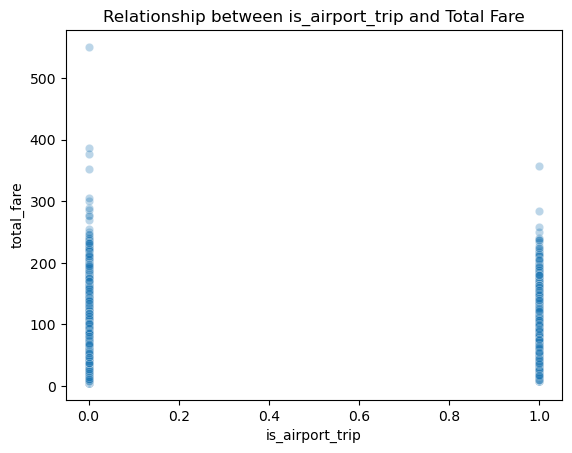

<Figure size 400x300 with 0 Axes>

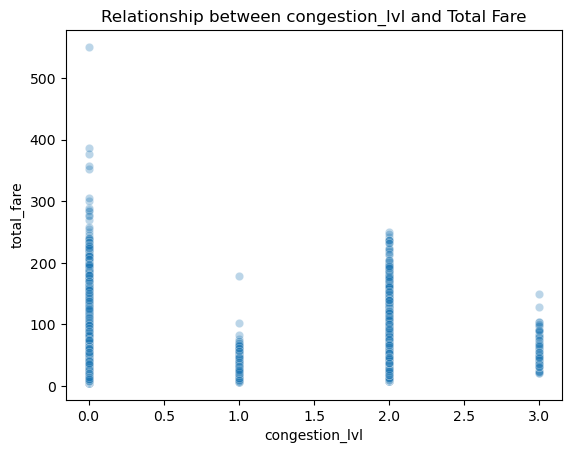

<Figure size 400x300 with 0 Axes>

In [155]:

features = ['is_airport_trip',	'congestion_lvl']
for feature in features:
    sns.scatterplot(x=data[feature], y=data['total_fare'], alpha=0.3)
    plt.title(f'Relationship between {feature} and Total Fare')
    plt.figure(figsize=(4, 3))
    plt.show()

In [156]:
data.drop(columns=['PULocationID_bin', 'DOLocationID_bin', 'day_x_time_bin'], inplace=True)

<Axes: >

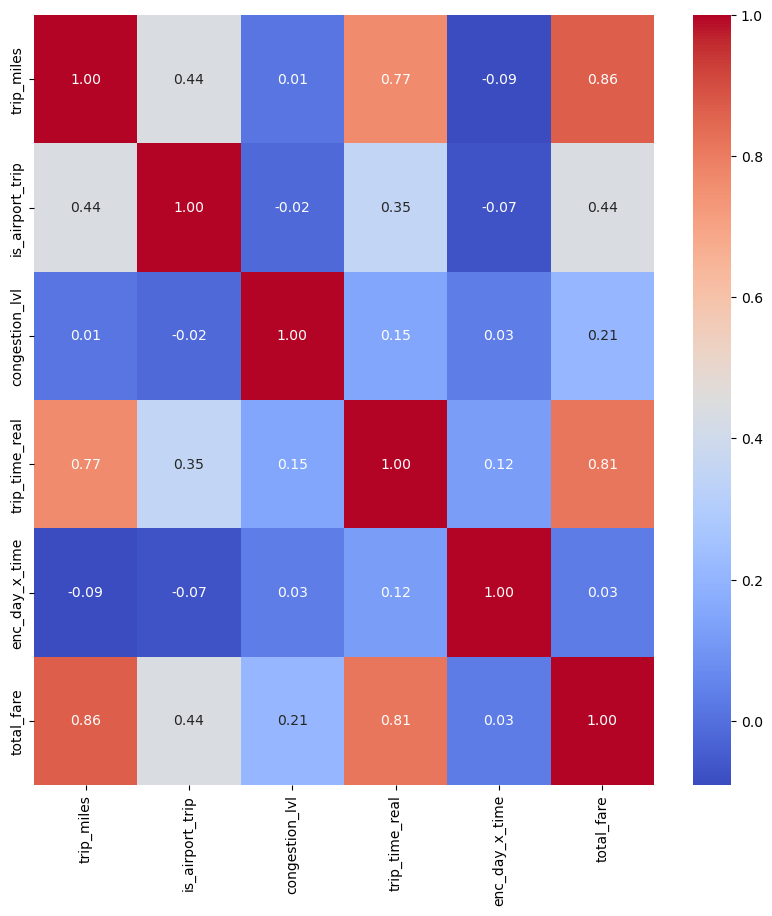

In [103]:
## generating correlation heatmap
data = pd.concat([X_train, y_train], axis=1)
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

## PCA

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178859 entries, 12201792 to 7419397
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trip_miles        178859 non-null  float64
 1   is_airport_trip   178859 non-null  int64  
 2   congestion_lvl    178859 non-null  int64  
 3   trip_time_real    178859 non-null  float64
 4   total_fare        178859 non-null  float64
 5   fare_per_mile     178859 non-null  float64
 6   enc_day_x_time    178859 non-null  float64
 7   enc_PULocationID  178859 non-null  float64
 8   enc_DOLocationID  178859 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 13.6 MB


In [160]:
data2 = data.copy()
data.drop(columns=['enc_PULocationID', 'enc_DOLocationID'], inplace=True)
X = data.drop('total_fare', axis=1)  # Assuming 'total_fare' is the target
y = data['total_fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [161]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

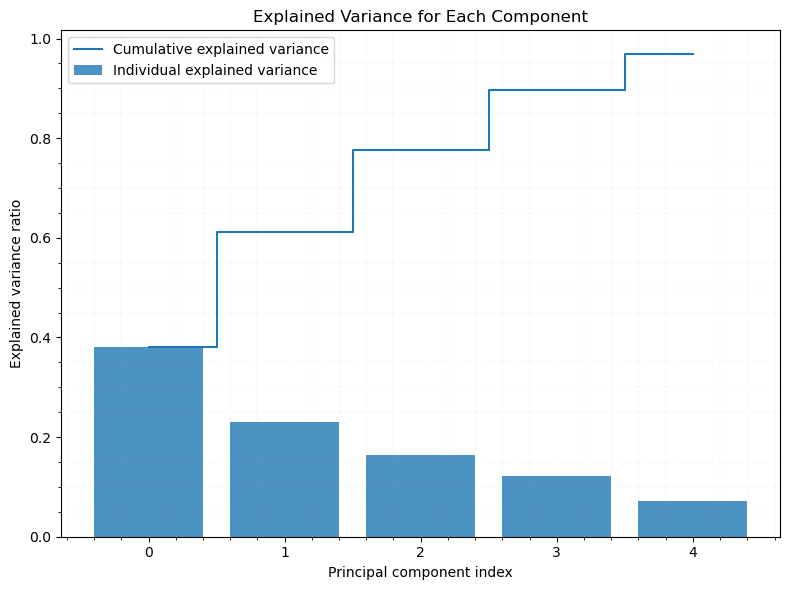

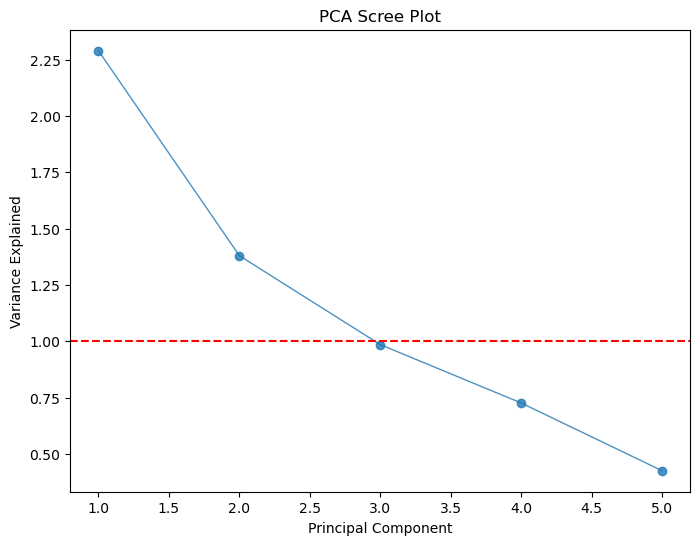

In [162]:
# Apply PCA
pca = PCA(n_components=5) 
pca.fit(X_train_scaled)
X_train_pca=pca.transform(X_train_scaled)


# Visualize explained variance for each component
exp_var_pca=pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(8,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance for Each Component')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
## scree plot ##

plt.figure(figsize=(8,6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'o-', linewidth=1, alpha=0.8)
plt.axhline(y=1, color='r', linestyle='--') # The Kaiser rule suggests keeping only the PCs that have eigenvalues greater than 1.
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

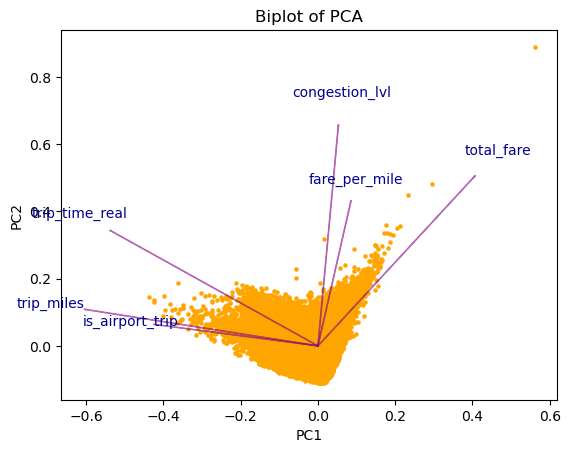

<Figure size 2000x2000 with 0 Axes>

In [163]:
def biplot(score,coef,labels=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5,
                color='orange')

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15,
                 coef[i,1] * 1.15,
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

    plt.figure(figsize=(20,20))

plt.title('Biplot of PCA')

biplot(X_train_pca,
       np.transpose(pca.components_),
       list(data.columns))

# Model Training

## Training

In [164]:
X_test_pca = pca.transform(X_test_scaled)

In [89]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Baseline Models

In [85]:
lr    = LinearRegression()
knn   = KNeighborsRegressor(n_neighbors=5)

In [167]:
# dictionary of the models that we chose for evaluation
models = {'lr': lr,
          'knn' : knn}

# getting the name and the model object from the dicitionary
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_pca, y_train)
    scores = cross_val_score(fit, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 57.62268830599756
Mean Squared Error (Cross-Validation): 42.121805467639156


In [168]:
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_scaled, y_train)
    scores = cross_val_score(fit, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 48.72104089363822
Mean Squared Error (Cross-Validation): 18.314657575243285


### More Models

In [90]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor

In [170]:
lasso = Lasso(alpha = 0.1)
en = ElasticNet(alpha = 0.1, random_state=0)
rg = Ridge(alpha=0.1)  
SGD = SGDRegressor(max_iter=1000, tol=1e-3)

In [171]:
models = {'Lasso': lasso,
          'ElasticNet' : en,
          'Ridge': rg,
          'SGDRegressor': SGD}

# getting the name and the model object from the dicitionary
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_pca, y_train)
    scores = cross_val_score(fit, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print(f" {name} MSE (Cross-Validation):", mean_mse)

 Lasso MSE (Cross-Validation): 57.68152458952729


 ElasticNet MSE (Cross-Validation): 58.32177213278328
 Ridge MSE (Cross-Validation): 57.62268827364094
 SGDRegressor MSE (Cross-Validation): 57.698662824896154


In [172]:
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_pca, y_train)
    scores = cross_val_score(fit, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print(f" {name} MSE (Cross-Validation):", mean_mse)

 Lasso MSE (Cross-Validation): 48.76504479791993
 ElasticNet MSE (Cross-Validation): 49.7805396126415
 Ridge MSE (Cross-Validation): 48.721040850213875
 SGDRegressor MSE (Cross-Validation): 48.95073160933776


In [173]:
from sklearn.svm import LinearSVR

In [174]:
svr = LinearSVR(epsilon=5.9, random_state=42, dual=True)
scores = cross_val_score(svr, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 58.58623402555637


In [175]:
svr = LinearSVR(epsilon=6, random_state=42, dual=True)
scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 49.701734118410116


In [176]:
from sklearn.tree import DecisionTreeRegressor

In [177]:
tree_reg = DecisionTreeRegressor(max_depth=12, random_state=42)
scores = cross_val_score(tree_reg, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 51.9173409629862


In [178]:
tree_reg = DecisionTreeRegressor(max_depth=12, random_state=42)
scores = cross_val_score(tree_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 3.7756769980718894


### Hyperparameter Tuning

In [179]:
from sklearn.model_selection import GridSearchCV

#### KNN

In [180]:
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)


Best parameters: {'n_neighbors': 3}
Best score: -17.31613456890643


#### Elastic Net 

In [181]:

en = ElasticNet()

param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid_search = GridSearchCV(en, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Best score: -48.85288453226927


#### Lasso

In [182]:
lasso = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'alpha': 0.001}
Best score: -48.72104402686485


#### Ridge

In [183]:
rg = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(rg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


Best parameters: {'alpha': 1}
Best score: -48.72104049839806


#### SDG

In [184]:
sdg = SGDRegressor()

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4, 1e-5]
}

grid_search = GridSearchCV(sdg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.0001}
Best score: -48.78901043805174


### Stacking Models

In [91]:
from sklearn.ensemble import StackingRegressor

In [111]:
en = ElasticNet(alpha=0.1, l1_ratio=0.9)
lasso = Lasso(alpha=0.001)
rg = Ridge(alpha=10)
sgd = SGDRegressor(alpha= 0.001, max_iter= 2000, penalty= 'elasticnet', tol=0.0001)

In [93]:
estimators = [
    ('en', en),
    ('lasso', lasso),
    ('rg', rg),
    ('lr', lr),
    ('sgd', sgd)
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())

### Comparing Models - Performance Evaluation

In [188]:
X_train_cv, X_val_cv, y_train_cv, y_val_cv = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=42)
stacking_regressor.fit(X_train_cv, y_train_cv)

StackingRegressor(estimators=[('en', ElasticNet(alpha=0.1, l1_ratio=0.9)),
                              ('lasso', Lasso(alpha=0.001)),
                              ('rg', Ridge(alpha=10)),
                              ('lr', LinearRegression()),
                              ('sgd',
                               SGDRegressor(alpha=0.001, max_iter=2000,
                                            penalty='elasticnet',
                                            tol=0.0001))],
                  final_estimator=Ridge())

In [97]:
models = models = {'linear': lr,
                    'knn' : knn,
                    'en': en,
                    'lasso': lasso,
                    'ridge': rg,
                    'sgd':sgd,
                    'stacking_regressor': stacking_regressor
                    }

In [95]:
import collections as co

In [98]:
results = co.defaultdict(dict)
for name, m in models.items():
    m.fit(X_train_scaled, y_train)
    y_pred = m.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2  = metrics.r2_score(y_test, y_pred)
    mae  = metrics.mean_absolute_error(y_test, y_pred)
    results[name]['R^2'] = r2
    results[name]['MSE'] = mse
    results[name]['MAE'] = mae
df = pd.DataFrame(results).T
df['1-R^2'] = 1-df['R^2']
df

,R^2,MSE,MAE,1-R^2
linear,0.833881,67.676514,4.594291,0.166119
knn,0.814606,75.529212,4.905753,0.185394
en,0.833669,67.762883,4.566171,0.166331
lasso,0.833881,67.676525,4.594121,0.166119
ridge,0.833880,67.676727,4.594117,0.166120
sgd,0.833239,67.937875,4.544408,0.166761
stacking_regressor,0.833855,67.687046,4.584240,0.166145


In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_ptrain = poly_features.fit_transform(X_train_scaled)
y_ptrain = y_train
y_ptest = y_test
X_ptest = poly_features.transform(X_test_scaled)


In [101]:
results = co.defaultdict(dict)
for name, m in models.items():
    m.fit(X_ptrain, y_ptrain)
    y_pred = m.predict(X_ptest)
    mse = mean_squared_error(y_ptest, y_pred)
    r2  = metrics.r2_score(y_ptest, y_pred)
    mae  = metrics.mean_absolute_error(y_ptest, y_pred)
    results[name]['R^2'] = r2
    results[name]['MSE'] = mse
    results[name]['MAE'] = mae
df = pd.DataFrame(results).T
df['1-R^2'] = 1-df['R^2']
df

/Users/daysondong/miniconda3/envs/SEA600/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.654e+05, tolerance: 2.717e+03
  model = cd_fast.enet_coordinate_descent(
/Users/daysondong/miniconda3/envs/SEA600/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.654e+05, tolerance: 2.717e+03
  model = cd_fast.enet_coordinate_descent(
/Users/daysondong/miniconda3/envs/SEA600/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

,R^2,MSE,MAE,1-R^2
linear,0.838354,65.854161,4.494947,0.161646
knn,0.814536,75.557450,4.909921,0.185464
en,0.836993,66.408853,4.500311,0.163007
lasso,0.838364,65.850217,4.494733,0.161636
ridge,0.838352,65.855025,4.494890,0.161648
sgd,0.775311,91.537758,5.200999,0.224689
stacking_regressor,0.838437,65.820401,4.499014,0.161563


## Recource Utilization Evaluation

Based on the comparison, we will not move on with knn, this section will evaluate simple Linear Regression, ElasticNet, Lasso, Ridge, SDG and stacking regressors

### Time Evaluation

#### Overall Time

In [192]:
%%timeit -r1
lr = LinearRegression()
fit = lr.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

17.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [193]:
%%timeit -r1
en = ElasticNet(alpha=0.1, l1_ratio=0.9)
fit = en.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

37.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [194]:
%%timeit -r1
lasso = Lasso(alpha=0.001)
fit = lasso.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

52.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [195]:
%%timeit -r1
rg = Ridge(alpha=10)
fit = rg.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

8.87 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [196]:
%%timeit -r1
sgd = SGDRegressor(alpha= 0.001, max_iter= 2000, penalty= 'elasticnet', tol=0.0001)
fit = sgd.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

157 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [197]:
%%timeit -r1
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())
fit = stacking_regressor.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

1.47 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Fitting Time

In [198]:
%timeit -r1 lr_fit = lr.fit(X_train_cv, y_train_cv)

%timeit -r1 en_fit = en.fit(X_train_cv, y_train_cv)

%timeit -r1 lasso_fit = lasso.fit(X_train_cv, y_train_cv)

%timeit -r1 rg_fit = rg.fit(X_train_cv, y_train_cv)

%timeit -r1 sgd_fit = sgd.fit(X_train_cv, y_train_cv)

%timeit -r1 stacking_fit = stacking_regressor.fit(X_train_cv, y_train_cv)

9.11 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
16.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
19.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
4.05 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
90.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
1.67 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Time Prediction

In [199]:
lr_fit = lr.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = lr_fit.predict(X_val_cv)

en_fit = en.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = en_fit.predict(X_val_cv)

lasso_fit = lasso.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = lasso_fit.predict(X_val_cv)

rg_fit = rg.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = rg_fit.predict(X_val_cv)

sgd_fit = sgd.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = sgd_fit.predict(X_val_cv)

stacking_fit = stacking_regressor.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = stacking_fit.predict(X_val_cv)

2.31 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2.54 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
222 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
257 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
2.41 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


### Memory Usage

#### Overall Usage

In [200]:
%load_ext memory_profiler

In [201]:
%%memit -r1
lr = LinearRegression()
fit = lr.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 885.89 MiB, increment: 1.11 MiB


In [202]:
%%memit -r1
en = ElasticNet(alpha=0.1, l1_ratio=0.9)
fit = en.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 886.03 MiB, increment: 0.14 MiB


In [203]:
%%memit -r1
lasso = Lasso(alpha=0.001)
fit = lasso.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 886.31 MiB, increment: 0.28 MiB


In [204]:
%%memit -r1
rg = Ridge(alpha=10)
fit = rg.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 886.34 MiB, increment: 0.03 MiB


In [205]:
%%memit -r1
sgd = SGDRegressor(alpha= 0.001, max_iter= 2000, penalty= 'elasticnet', tol=0.0001)
fit = sgd.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 886.36 MiB, increment: 0.00 MiB


In [206]:
%%memit -r1
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())
fit = stacking_regressor.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 891.30 MiB, increment: 4.94 MiB


#### Fitting Memory Usage

In [207]:
%memit -r1 lr_fit = lr.fit(X_train_cv, y_train_cv)
%memit -r1 en_fit = en.fit(X_train_cv, y_train_cv)
%memit -r1 lasso_fit = lasso.fit(X_train_cv, y_train_cv)
%memit -r1 rg_fit = rg.fit(X_train_cv, y_train_cv)
%memit -r1 sgd_fit = sgd.fit(X_train_cv, y_train_cv)
%memit -r1 stacking_fit = stacking_regressor.fit(X_train_cv, y_train_cv)

peak memory: 891.30 MiB, increment: 0.00 MiB
peak memory: 891.19 MiB, increment: 0.00 MiB
peak memory: 891.19 MiB, increment: 0.00 MiB
peak memory: 891.30 MiB, increment: 0.11 MiB
peak memory: 891.30 MiB, increment: 0.00 MiB
peak memory: 891.31 MiB, increment: 0.12 MiB


In [208]:
lr_fit = lr.fit(X_train_cv, y_train_cv)
%memit -r1 preds = lr_fit.predict(X_val_cv)

en_fit = en.fit(X_train_cv, y_train_cv)
%memit -r1 preds = en_fit.predict(X_val_cv)

lasso_fit = lasso.fit(X_train_cv, y_train_cv)
%memit -r1 preds = lasso_fit.predict(X_val_cv)

rg_fit = rg.fit(X_train_cv, y_train_cv)
%memit -r1 preds = rg_fit.predict(X_val_cv)

sgd_fit = sgd.fit(X_train_cv, y_train_cv)
%memit -r1 preds = sgd_fit.predict(X_val_cv)

stacking_fit = stacking_regressor.fit(X_train_cv, y_train_cv)
%memit -r1 preds = stacking_fit.predict(X_val_cv)

peak memory: 891.31 MiB, increment: 0.00 MiB
peak memory: 891.31 MiB, increment: 0.00 MiB
peak memory: 891.31 MiB, increment: 0.00 MiB
peak memory: 891.31 MiB, increment: 0.00 MiB
peak memory: 891.31 MiB, increment: 0.00 MiB
peak memory: 892.22 MiB, increment: 0.00 MiB


# Final Model

Based on the performance and resource utilization, we choose to use Ridge Regressor

In [107]:
X_train.head()

,trip_miles,is_airport_trip,congestion_lvl,trip_time_real,enc_day_x_time
3150910,2.740,0,0,12.950,6.059981
14865239,15.570,0,2,31.117,5.047886
15844313,1.650,0,0,14.833,6.264941
6858049,4.558,1,0,17.100,6.115828
10866668,2.480,0,2,23.500,7.993224


In [112]:
rg.fit(X_train_scaled, y_train)

Ridge(alpha=10)

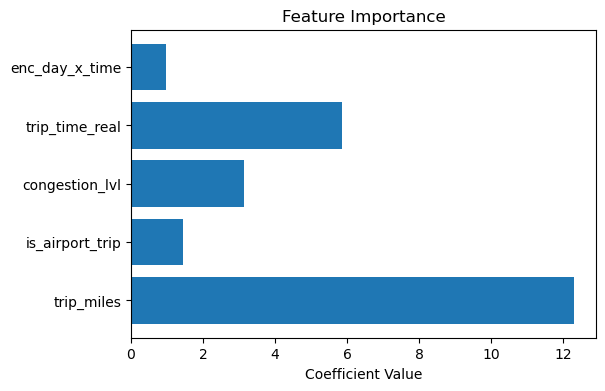

In [113]:
features = X_train.columns.tolist()
coefficients = rg.coef_


# Plotting feature importance
plt.figure(figsize=(6, 4))
plt.barh(range(len(features)), coefficients, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


In [210]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [211]:
ridge = Ridge()

param_distribs = {'alpha': randint(low=1, high=15),
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'fit_intercept': [True] }

rnd_search = RandomizedSearchCV(
    ridge, param_distributions=param_distribs, n_iter=100, cv=3,
    scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_train_scaled, y_train)

print("Best parameters:", rnd_search.best_params_)

# Best score achieved
print("Best score:", rnd_search.best_score_)

Best parameters: {'alpha': 8, 'fit_intercept': True, 'solver': 'saga'}
Best score: -48.721303774802294


In [212]:
final_predictions = rg.predict(X_test_scaled)

final_mae = metrics.mean_absolute_error(y_test, final_predictions)
print(final_mae)  

3.7663871610844457


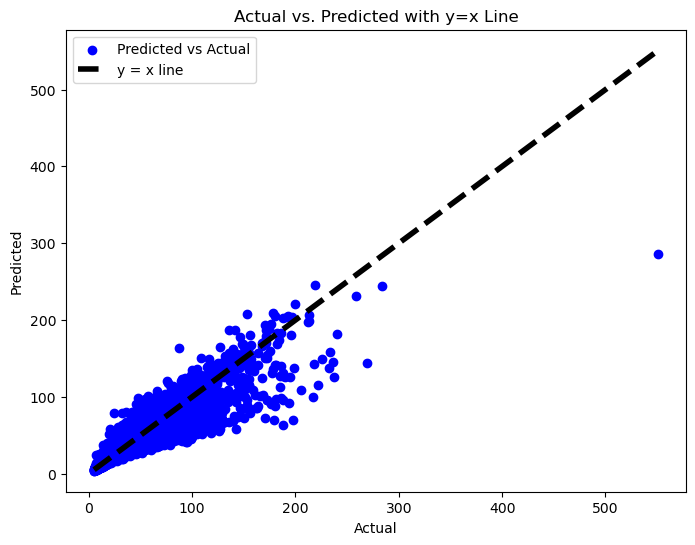

In [213]:
# Actual vs. Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='y = x line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted with y=x Line')
plt.legend()
plt.show()

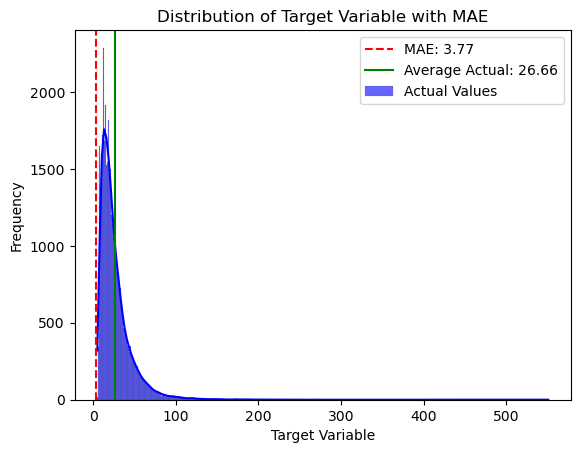

In [214]:
avg = y_test.mean()
sns.histplot(y_test, kde=True, label='Actual Values', color='blue', alpha=0.6)
plt.axvline(x=final_mae, color='red', linestyle='--', label=f'MAE: {final_mae:.2f}')
plt.axvline(x=avg, color='green', linestyle='-', label=f'Average Actual: {avg:.2f}')

plt.title('Distribution of Target Variable with MAE')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [215]:
mae_percent = final_mae / avg * 100
print(f"MAE% {mae_percent:.2f}%")

MAE% 14.13%


In [216]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [217]:
# Step 1: feature filter
features_to_keep = ['base_passenger_fare', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles', 'airport_fee', 'congestion_surcharge']

feature_selector = ColumnTransformer([
    ('selector', 'passthrough', features_to_keep)
], remainder='drop') 

In [218]:
# Step 2: total fare
def calculate_total_fare(X):
    X = X.copy()  # Avoid changes to the original DataFrame
    X['total_fare'] = X['base_passenger_fare'] + X['airport_fee'] + X['congestion_surcharge']
    return X

total_fare_transformer = FunctionTransformer(calculate_total_fare)


In [219]:

# Example pipeline with FunctionTransformer
pipeline = Pipeline(steps=[
    ('feature_selector', feature_selector),
    ('add_total_fare', total_fare_transformer),
])

In [220]:
data2=pd.read_parquet('./fhvhv_tripdata_2022-11.parquet')
data2 = data2.sample(n=200000, random_state=1)

## Extra

In [221]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(forest_reg, X_train_scaled, y_train,
                                scoring="neg_root_mean_squared_error", cv=5)

In [222]:
forest_rmses

array([0.69551692, 1.13595462, 1.72413865, 1.12709038, 1.2611289 ])

In [223]:
forest_reg.fit(X_train_cv, y_train_cv)
y_pred = forest_reg.predict(X_val_cv)
mse = mean_squared_error(y_val_cv, y_pred)
r2  = metrics.r2_score(y_val_cv, y_pred)
mae  = metrics.mean_absolute_error(y_val_cv, y_pred)

print(mse)
print(mae)

1.321163625423725
0.14522078661736657


In [224]:
y_pred = forest_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2  = metrics.r2_score(y_test, y_pred)
mae  = metrics.mean_absolute_error(y_test, y_pred)

In [225]:
print(mse)
print(mae)

2.0492621800583666
0.13973380968355142


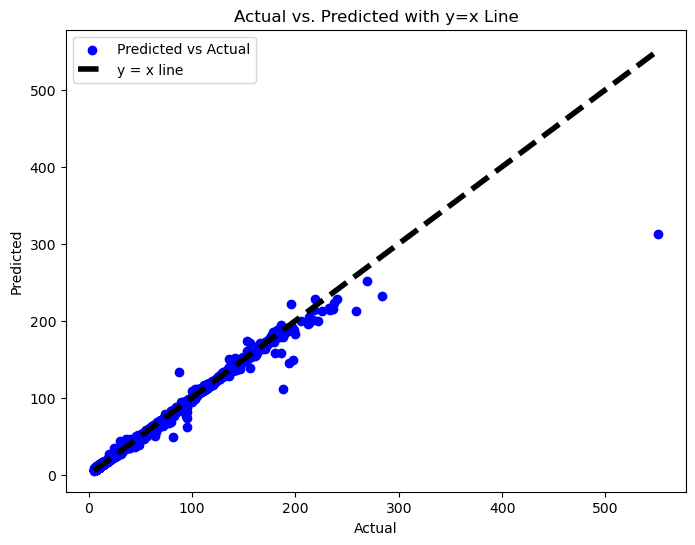

In [226]:
# Actual vs. Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='y = x line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted with y=x Line')
plt.legend()
plt.show()